
# Explore here

In [85]:
# Your code here
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# URL del archivo CSV
url = "https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv"

# Hacer una solicitud GET para obtener el archivo
response = requests.get(url)

# Verificar si la solicitud fue exitosa (código 200)
if response.status_code == 200:
    # Guardar el contenido del archivo en la carpeta data/raw
    with open("/workspaces/DECISION_TREE_ALGO_JesusCastanedam/data/raw/diabetes.csv", "wb") as f:
        f.write(response.content)
else:
    print("Error al descargar el archivo:", response.status_code)

In [86]:
df = pd.read_csv("/workspaces/DECISION_TREE_ALGO_JesusCastanedam/data/raw/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [87]:
df.shape

(768, 9)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [89]:
round(df.describe(),2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


### Null values

In [90]:
df.isnull().sum().sort_values(ascending=False)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Duplicate values

In [91]:
print('Datos duplicados: ' + str(df.duplicated().sum()))

Datos duplicados: 0


### Analysis of numerical variables

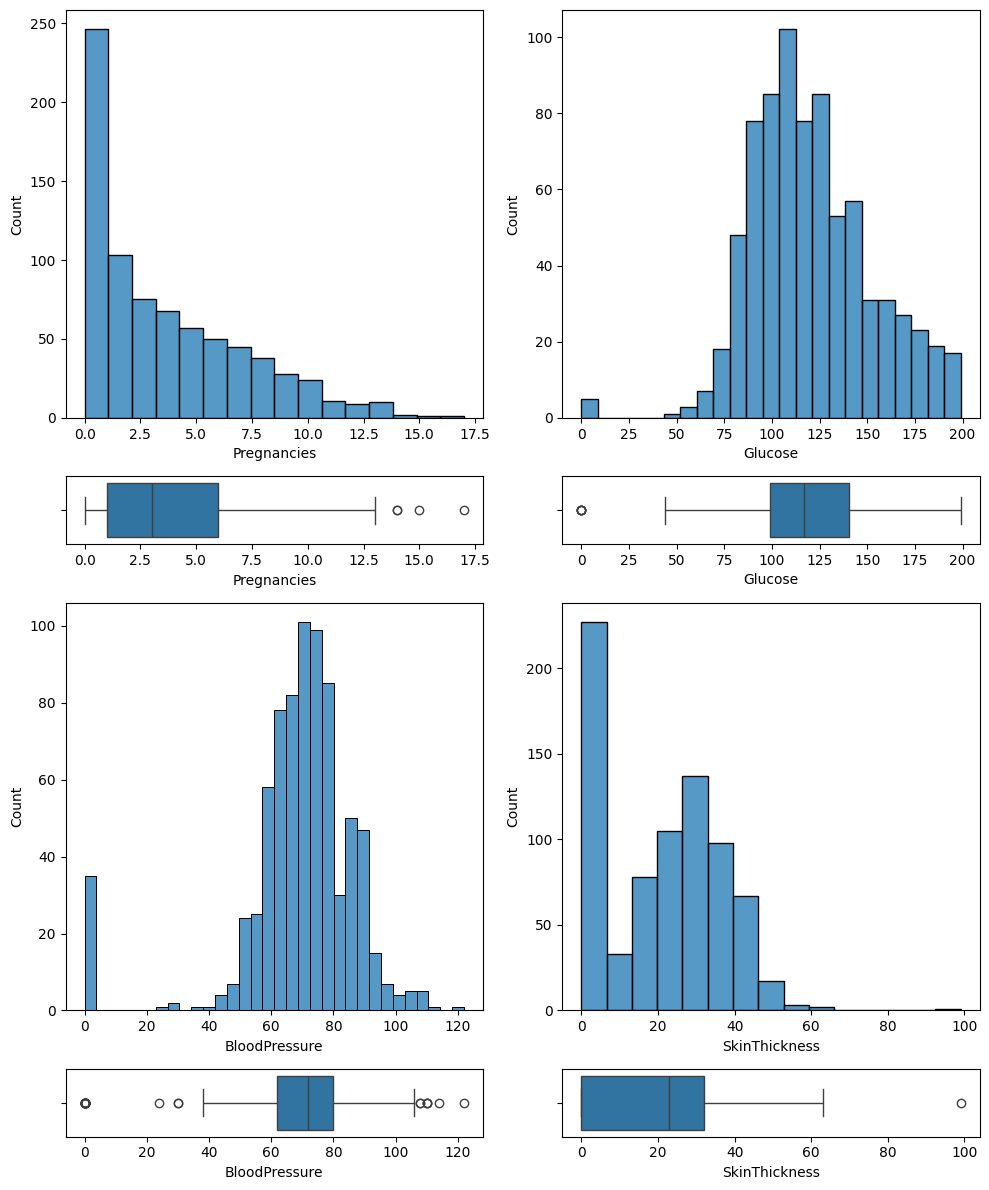

In [92]:
fig, axis = plt.subplots(4, 2, figsize = (10, 12), gridspec_kw={"height_ratios": [6, 1, 6, 1]})

# Crear una figura múltiple con histogramas y diagramas de caja
# Pregnancies
sns.histplot(ax = axis[0, 0], data = df, x = "Pregnancies")
sns.boxplot(ax = axis[1, 0], data = df, x = "Pregnancies")

sns.histplot(ax = axis[0, 1], data = df, x = "Glucose")
sns.boxplot(ax = axis[1, 1], data = df, x = "Glucose")

sns.histplot(ax = axis[2, 0], data = df, x = "BloodPressure")
sns.boxplot(ax = axis[3, 0], data = df, x = "BloodPressure")

sns.histplot(ax = axis[2, 1], data = df, x = "SkinThickness")
sns.boxplot(ax = axis[3, 1], data = df, x = "SkinThickness")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

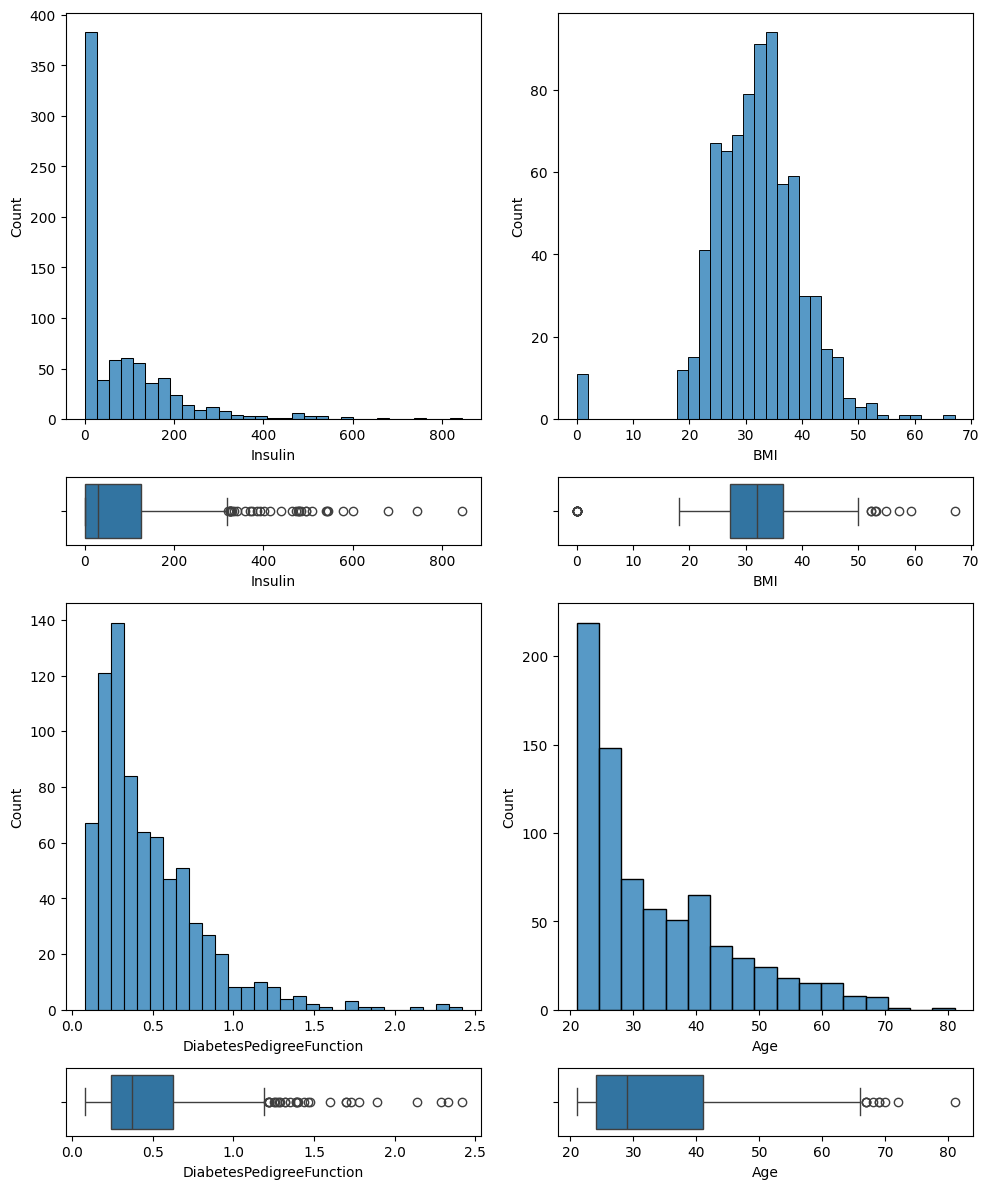

In [93]:
fig, axis = plt.subplots(4, 2, figsize = (10, 12), gridspec_kw={"height_ratios": [6, 1, 6, 1]})

# Crear una figura múltiple con histogramas y diagramas de caja

sns.histplot(ax = axis[0, 0], data = df, x = "Insulin")
sns.boxplot(ax = axis[1, 0], data = df, x = "Insulin")

sns.histplot(ax = axis[0, 1], data = df, x = "BMI")
sns.boxplot(ax = axis[1, 1], data = df, x = "BMI")

sns.histplot(ax = axis[2, 0], data = df, x = "DiabetesPedigreeFunction")
sns.boxplot(ax = axis[3, 0], data = df, x = "DiabetesPedigreeFunction")

sns.histplot(ax = axis[2, 1], data = df, x = "Age")
sns.boxplot(ax = axis[3, 1], data = df, x = "Age")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

### Outliers

In [94]:
Q1 = df['BMI'].quantile(0.25)
Q3 = df['BMI'].quantile(0.75)
IQR = Q3 - Q1
lower_BMI = Q1 - 1.5*IQR
upper_BMI = Q3 + 1.5*IQR

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_BMI, 2)} y {round(lower_BMI, 2)}, con un rango intercuartílico de {round(IQR, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 50.55 y 13.35, con un rango intercuartílico de 9.3


In [95]:
# Descartamos las personas que tienen un BMI igual a 0
df_out = df[(df['BMI'] > 13.5) & (df['BMI'] < 50.25) ]
df_out.shape


(749, 9)

In [96]:
Q1 = df_out['Glucose'].quantile(0.25)
Q3 = df_out['Glucose'].quantile(0.75)
IQR = Q3 - Q1
lower_Glucose = Q1 - 1.5*IQR
upper_Glucose = Q3 + 1.5*IQR

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_Glucose, 2)} y {round(lower_Glucose, 2)}, con un rango intercuartílico de {round(IQR, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 204.0 y 36.0, con un rango intercuartílico de 42.0


In [97]:
df_out = df_out[(df_out['Glucose'] > 36) & (df_out['Glucose'] < 205)]
df_out.shape

(744, 9)

In [98]:
Q1 = df_out['Pregnancies'].quantile(0.25)
Q3 = df_out['Pregnancies'].quantile(0.75)
IQR = Q3 - Q1
lower_Pregnancies = Q1 - 1.5*IQR
upper_Pregnancies = Q3 + 1.5*IQR

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_Pregnancies, 2)} y {round(lower_Pregnancies, 2)}, con un rango intercuartílico de {round(IQR, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 13.5 y -6.5, con un rango intercuartílico de 5.0


In [99]:
df_out = df_out[(df_out['Pregnancies'] < 14) & (df_out['Pregnancies'] >= 0)]
df_out.shape

(740, 9)

In [100]:
Q1 = df_out['Insulin'].quantile(0.25)
Q3 = df_out['Insulin'].quantile(0.75)
IQR = Q3 - Q1
lower_Insulin = Q1 - 1.5*IQR
upper_Insulin = Q3 + 1.5*IQR

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_Insulin, 2)} y {round(lower_Insulin, 2)}, con un rango intercuartílico de {round(IQR, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 325.0 y -195.0, con un rango intercuartílico de 130.0


In [101]:
df_out['Insulin'].value_counts() / len(df_out['Insulin']) 


Insulin
0      0.482432
105    0.014865
140    0.012162
130    0.010811
120    0.010811
         ...   
178    0.001351
127    0.001351
510    0.001351
16     0.001351
112    0.001351
Name: count, Length: 182, dtype: float64

<Axes: >

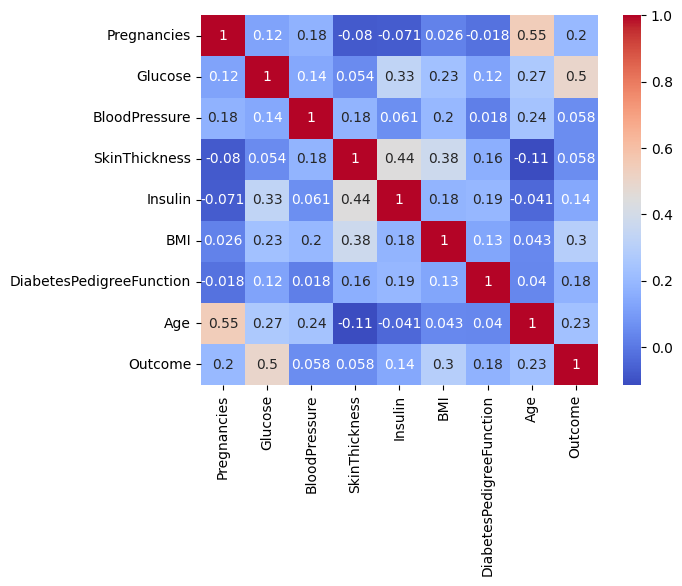

In [102]:
sns.heatmap(df_out.corr(), annot=True, cmap='coolwarm')

In [103]:
print(df.shape)
print(df_out.shape)

(768, 9)
(740, 9)


Se observó que las columnas 'Insulin', 'SkinThickness' y 'BloodPressure' presentan una baja correlación y un porcentaje considerable de valores nulos, por lo que se decidió eliminarlas del DataFrame.

In [104]:
dc = df_out.drop(['Insulin', 'SkinThickness', 'BloodPressure'], axis=1)
dc.columns

Index(['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age',
       'Outcome'],
      dtype='object')

<Axes: >

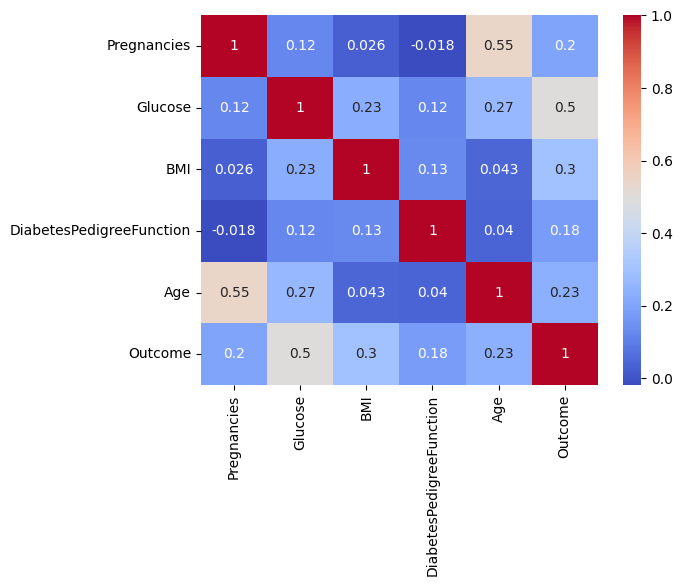

In [105]:
sns.heatmap(dc.corr(), annot=True, cmap='coolwarm')

### Modelado

In [106]:

from sklearn.model_selection import train_test_split

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error, r2_score

from pickle import dump

In [107]:
X = dc.drop('Outcome', axis=1)
y = dc['Outcome']

In [108]:
# split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Guardar mi informacion en dos archivos .csv para el trabajo desde app.py
# Unir X_train con y_train
train_data = pd.concat([X_train, y_train], axis=1)

# Unir X_test con y_test
test_data = pd.concat([X_test, y_test], axis=1)

# Guardar en archivos CSV
train_data.to_csv('../data/processed/train_data.csv', index=False)
test_data.to_csv('../data/processed/test_data.csv', index=False)

In [113]:
X_train.head()

,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction,Age
258,1,193,25.9,0.655,24
574,1,143,30.1,0.892,23
548,1,164,32.8,0.341,50
510,12,84,29.7,0.297,46
143,10,108,32.4,0.272,42


In [110]:
X.shape

(740, 5)

In [111]:
y.unique()

array([1, 0])

<Axes: >

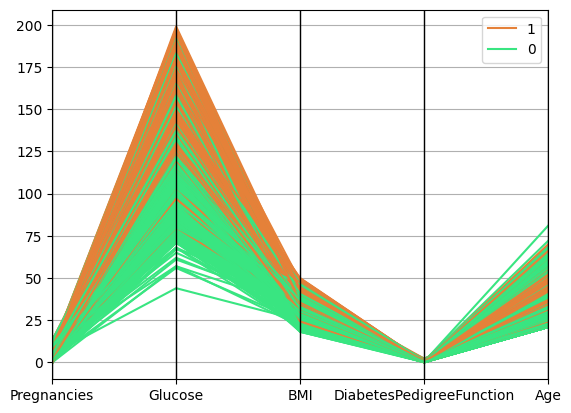

In [115]:
pd.plotting.parallel_coordinates(dc, "Outcome", color = ("#E58139", "#39E581", "#8139E5"))

In [116]:
# modelo
model = DecisionTreeClassifier(random_state = 42, max_depth= 4)

# entrenamiento
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

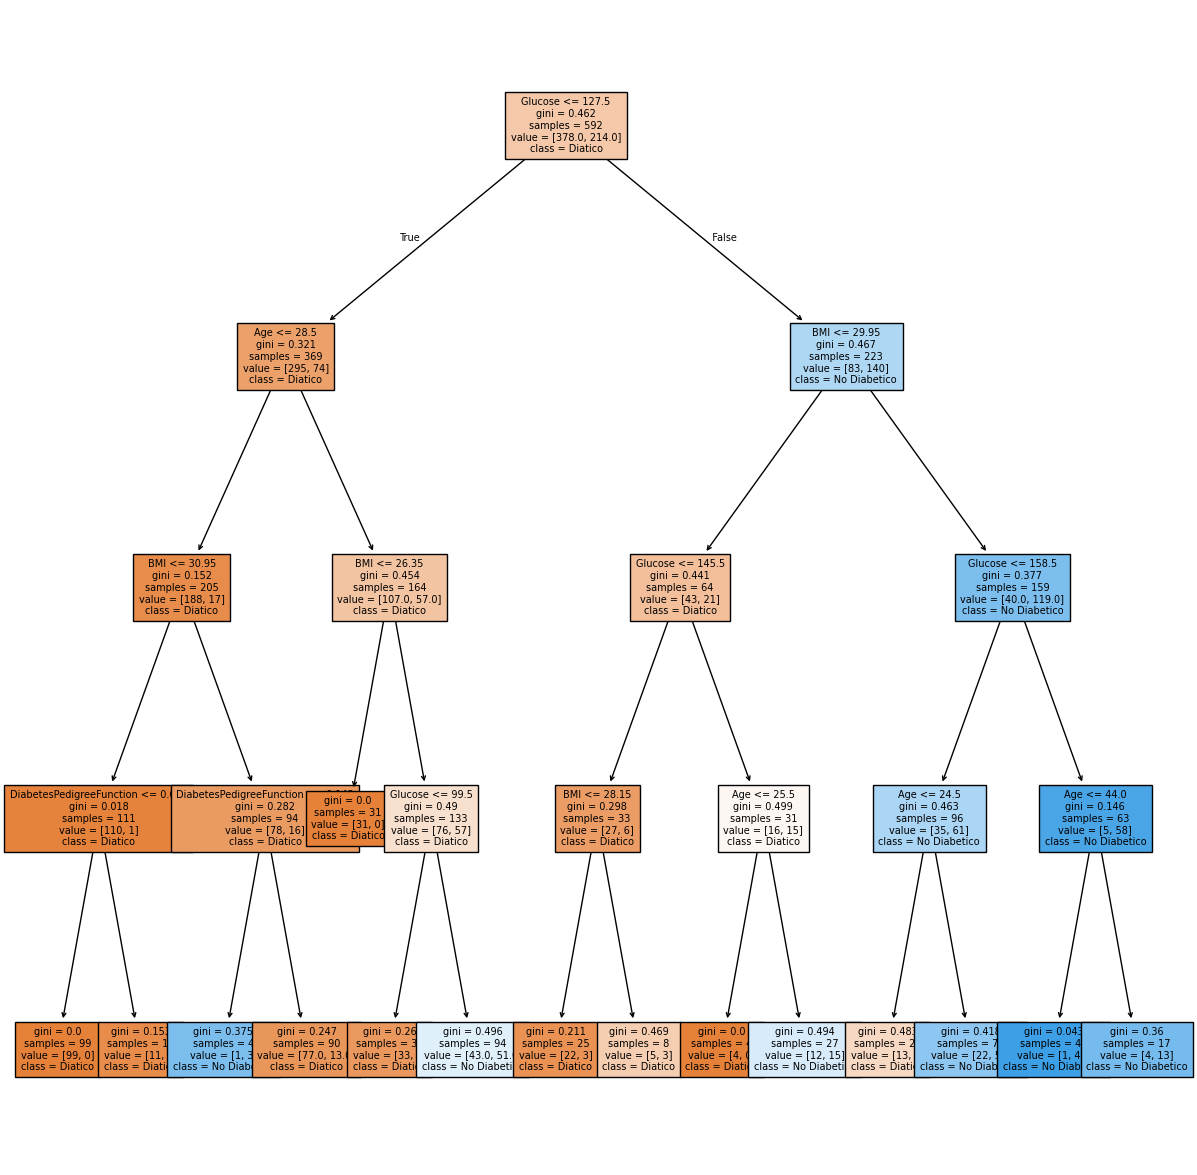

In [117]:
fig = plt.figure(figsize=(15,15))

tree.plot_tree(model, feature_names = list(X_train.columns), class_names = ["Diatico", "No Diabetico"], filled = True, max_depth=4,fontsize=7)


plt.show()

In [118]:
# predicción
y_pred_test = model.predict(X_test)
y_pred_test

array([1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0])

In [119]:
y_pred_train = model.predict(X_train)
y_pred_train

array([0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [123]:
# metricas
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train, y_pred_train)

f1_score_test = f1_score(y_test, y_pred_test, average='micro')
f1_score_train = f1_score(y_train, y_pred_train, average='micro')

precision_test = precision_score(y_test, y_pred_test, average='micro')
precision_train = precision_score(y_train, y_pred_train, average='micro')

recall_test = recall_score(y_test, y_pred_test, average='micro')
recall_train = recall_score(y_train, y_pred_train, average='micro')

print("Accuracy Test: ", accuracy_test)
print("F1 score Test: ", f1_score_test)
print("Precision Test: ", precision_test)
print("Recall Test: ", recall_test)

print("\nAccuracy Train: ", accuracy_train)
print("F1 score Train: ", f1_score_train)
print("Precision Train: ", precision_train)
print("Recall Train: ", recall_train)

Accuracy Test:  0.7364864864864865
F1 score Test:  0.7364864864864865
Precision Test:  0.7364864864864865
Recall Test:  0.7364864864864865

Accuracy Train:  0.8006756756756757
F1 score Train:  0.8006756756756757
Precision Train:  0.8006756756756757
Recall Train:  0.8006756756756757


In [124]:
print(classification_report(y_test, y_pred_test, target_names=["Diatico", "No Diabetico"]))

              precision    recall  f1-score   support

     Diatico       0.93      0.69      0.79       108
No Diabetico       0.51      0.85      0.64        40

    accuracy                           0.74       148
   macro avg       0.72      0.77      0.71       148
weighted avg       0.81      0.74      0.75       148



In [125]:
tree_clf = DecisionTreeClassifier(random_state=42)

param_grid = {
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 10, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 10],
    'criterion': ['gini', 'entropy']
}

In [126]:
grid_search = GridSearchCV(
    estimator=tree_clf,
    param_grid=param_grid,
    cv=5,  # validación cruzada con 5 folds
    scoring='accuracy',  # puedes usar también 'accuracy', 'recall', etc.
    n_jobs=-1,     # usa todos los núcleos disponibles
    verbose=1
)

grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 288 candidates, totalling 1440 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 10, None],
                         'min_samples_leaf': [1, 2, 4, 10],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='accuracy', verbose=1)

In [127]:
print("Mejores hiperparámetros:", grid_search.best_params_)

best_model = grid_search.best_estimator_

# Evaluamos en test:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

y_pred = best_model.predict(X_test)

print("Accuracy Test:", accuracy_score(y_test, y_pred))
print("F1 Score Test:", f1_score(y_test, y_pred))
print("Precision Test:", precision_score(y_test, y_pred))
print("Recall Test:", recall_score(y_test, y_pred))



Mejores hiperparámetros: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 2}
Accuracy Test: 0.7432432432432432
F1 Score Test: 0.62
Precision Test: 0.5166666666666667
Recall Test: 0.775


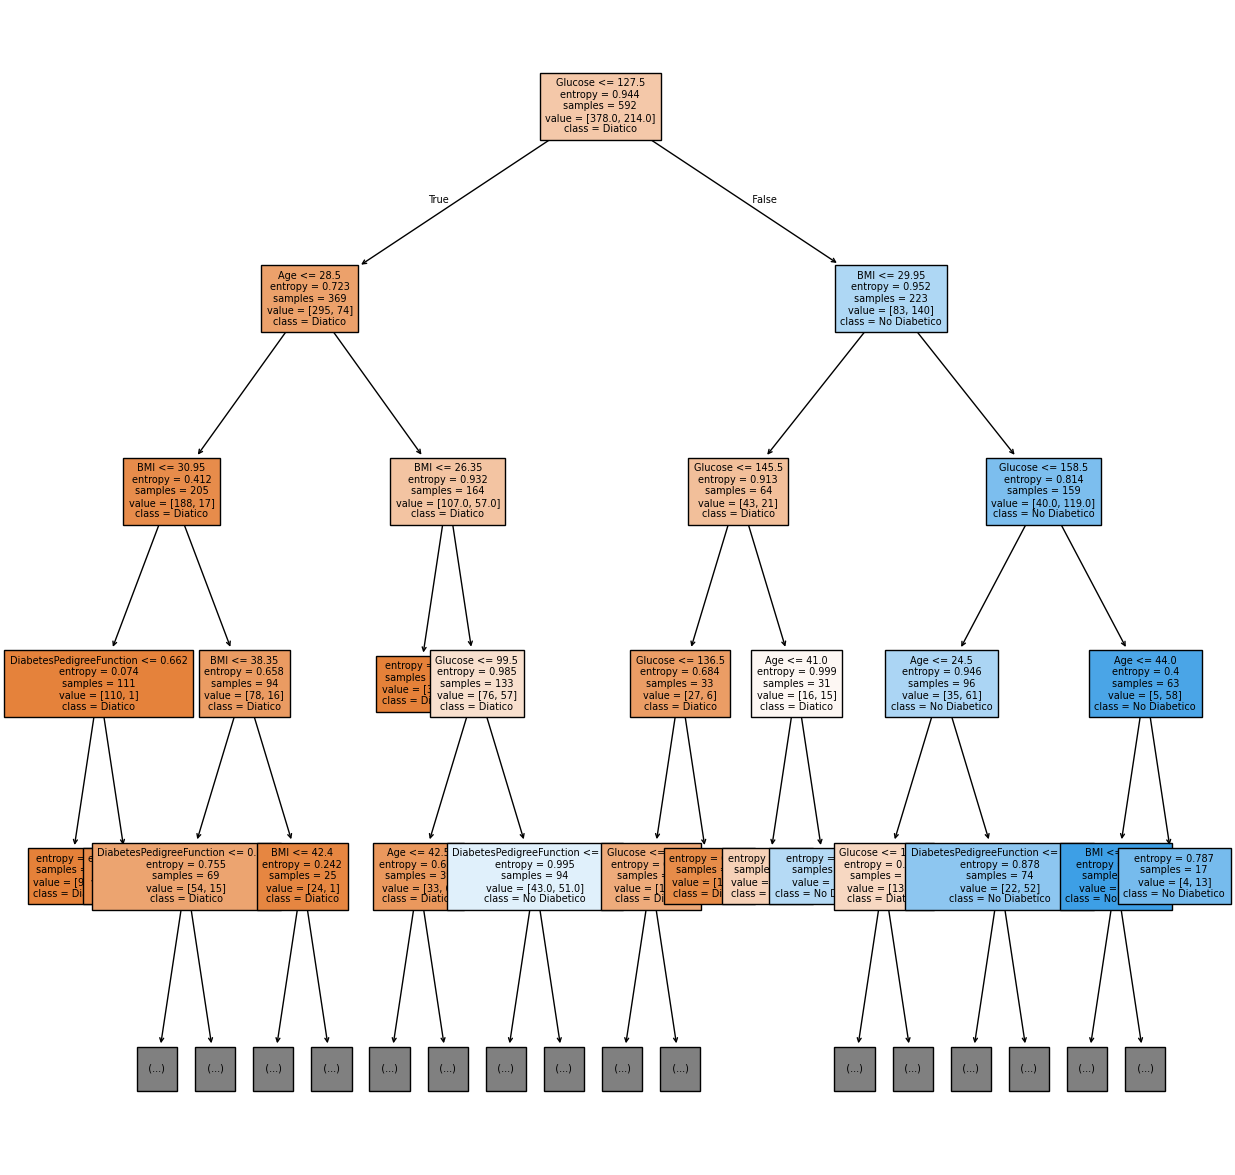

In [128]:
fig = plt.figure(figsize=(15,15))

tree.plot_tree(best_model, feature_names = list(X_train.columns), class_names = ["Diatico", "No Diabetico"], filled = True, max_depth=4,fontsize=7)


plt.show()